In [ ]:
!pip install scikit-learn
import sklearn

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df=pd.read_csv('/content/drive/MyDrive/DS Data Sets/Support Vector Machines/forestfires.csv')

In [16]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [18]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.shape

(517, 31)

In [20]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [21]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
# Visualizations
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


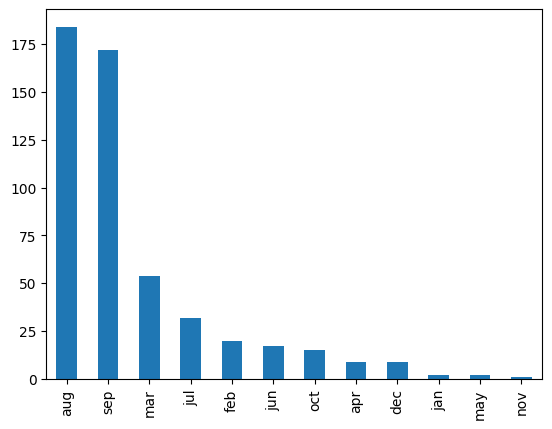

In [25]:
df.month.value_counts().plot.bar();

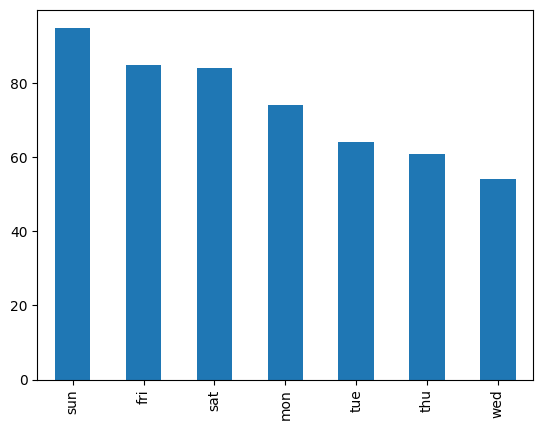

In [26]:
df.day.value_counts().plot.bar();

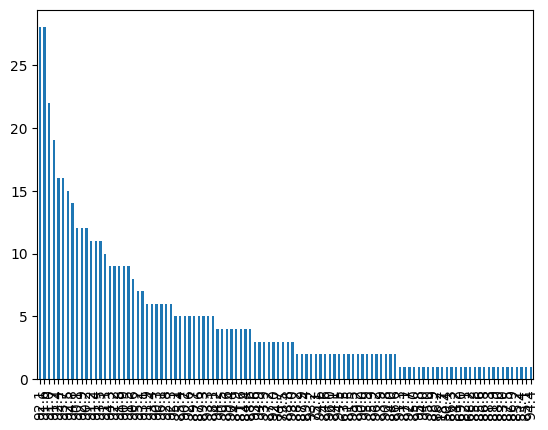

In [27]:
df.FFMC.value_counts().plot.bar();

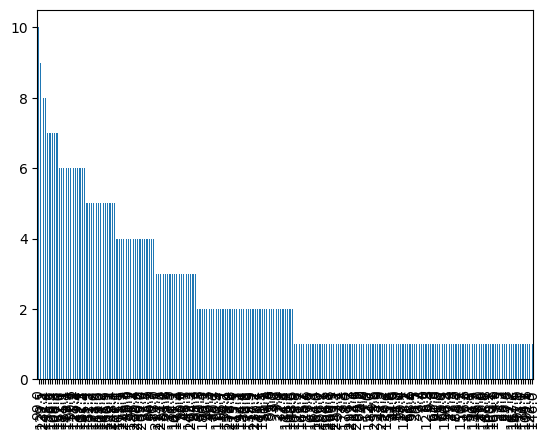

In [28]:
df.DMC.value_counts().plot.bar();

In [29]:
data=df.copy()
data.drop(['month','day'],axis=1,inplace=True)
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [30]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt


<Axes: xlabel='area', ylabel='Density'>

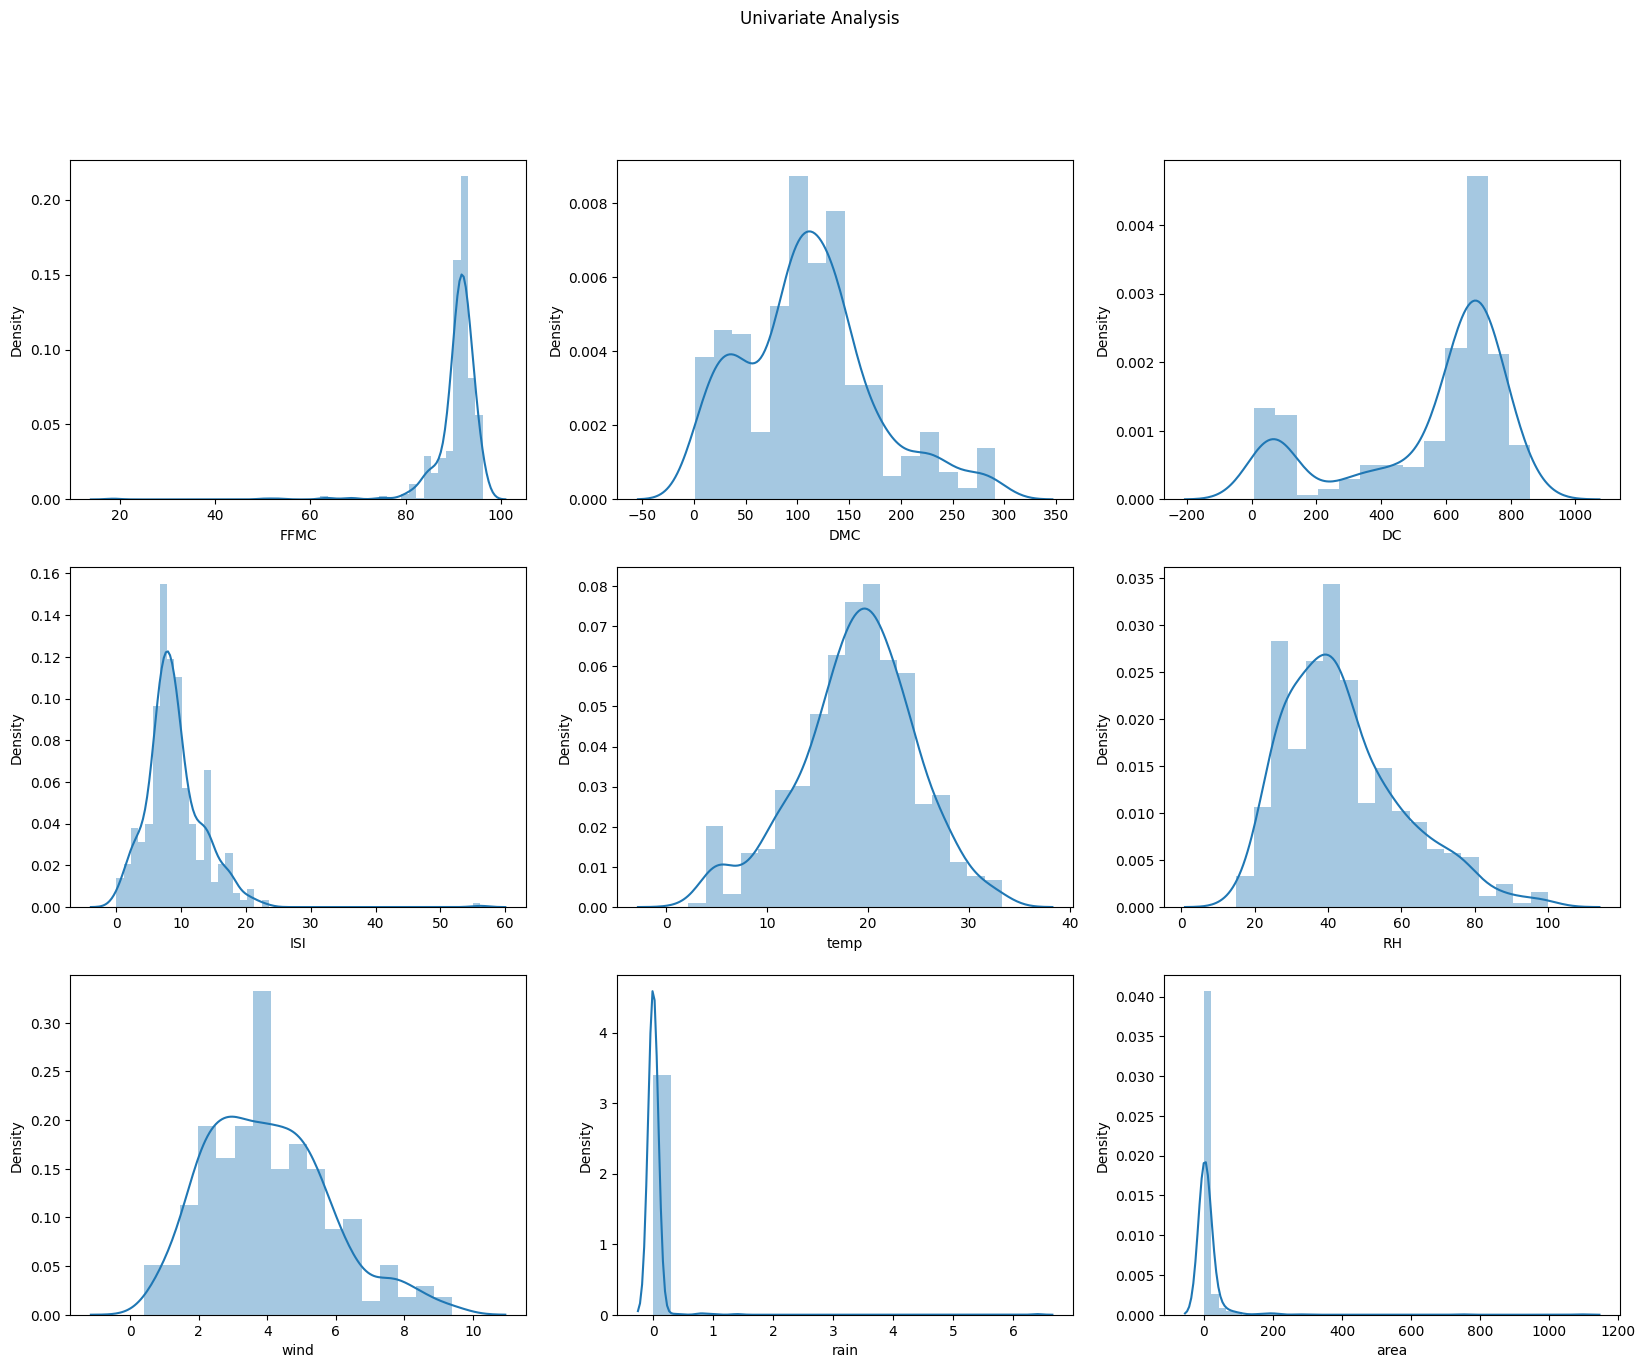

In [33]:
import warnings
warnings.filterwarnings('ignore')
fig,axes=plt.subplots(3,3,figsize=(20,15))
fig.suptitle('Univariate Analysis')
sns.distplot(data['FFMC'],ax=axes[0,0])
sns.distplot(data['DMC'],ax=axes[0,1])
sns.distplot(data['DC'],ax=axes[0,2])
sns.distplot(data['ISI'],ax=axes[1,0])
sns.distplot(data['temp'],ax=axes[1,1])
sns.distplot(data['RH'],ax=axes[1,2])
sns.distplot(data['wind'],ax=axes[2,0])
sns.distplot(data['rain'],ax=axes[2,1])
sns.distplot(data['area'],ax=axes[2,2])

In [34]:
# Normalizing Data
def norm_fun(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [35]:
data.loc[data['size_category']=='small','size_category']=0
data.loc[data['size_category']=='large','size_category']=1

In [36]:
data.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

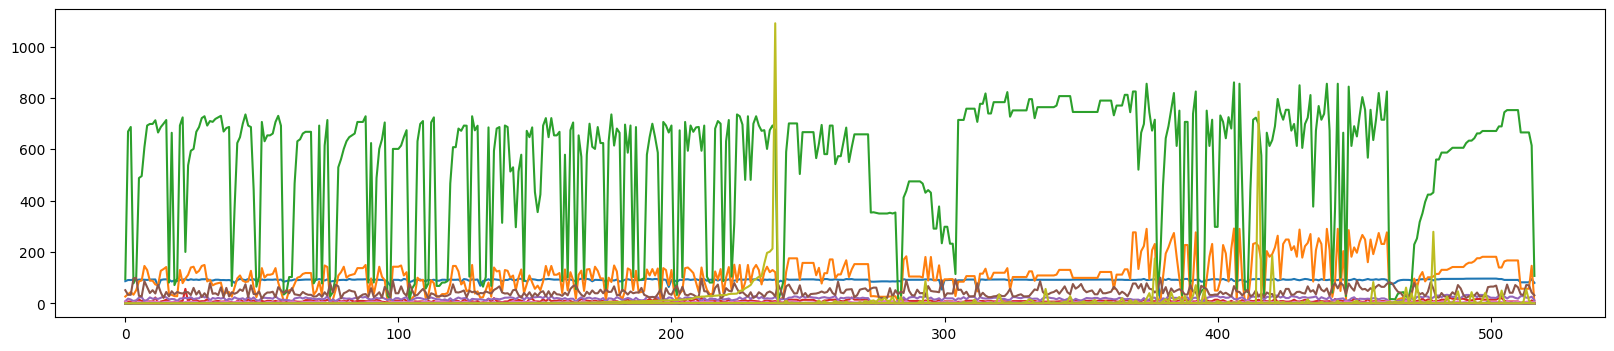

In [38]:
plt.figure(figsize=(20,4))
plt.plot(data)

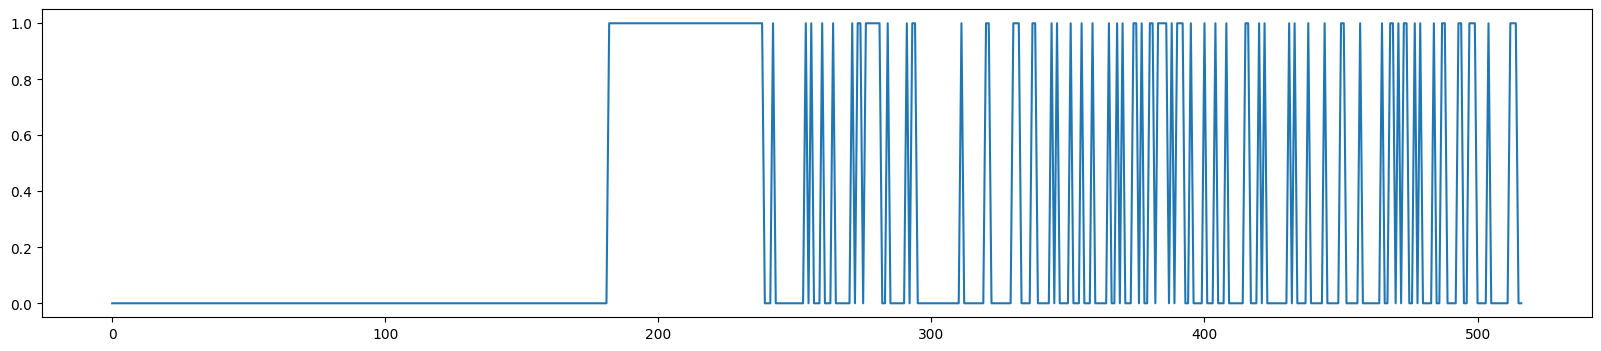

In [41]:

plt.figure(figsize=(20,4))
plt.plot(data.size_category)

<Axes: xlabel='size_category', ylabel='Density'>

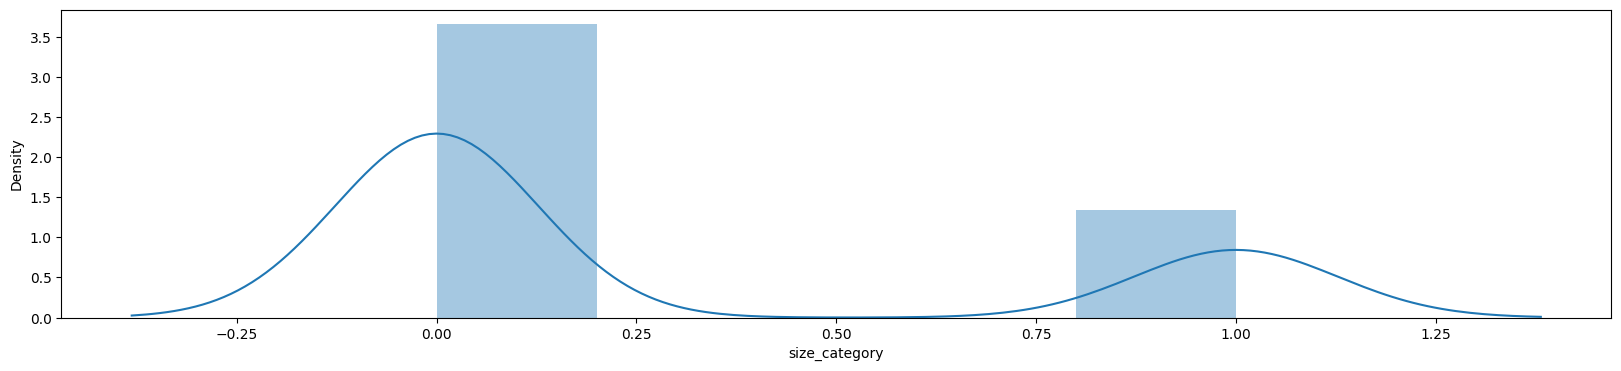

In [42]:
plt.figure(figsize=(20,4))
sns.distplot(data.size_category)

In [43]:
x=data.iloc[:,0:27]
y=data.iloc[:,27]

In [44]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,1,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,1,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,1,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    0
514    0
515    0
516    0
Name: monthsep, Length: 517, dtype: int64

In [46]:
# multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def calc_vif(x):
  vif=pd.DataFrame()
  vif['variables']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]

  return(vif)


In [49]:
x=data.iloc[:,:28]
calc_vif(x)

,variables,VIF
0,FFMC,2.279352
1,DMC,3.876881
2,DC,26.504814
3,ISI,1.812856
4,temp,4.515820
5,RH,2.769473
6,wind,1.280596
7,rain,1.088374
8,area,1.041374
9,dayfri,inf


In [50]:
# Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [51]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((361, 28), (361,), (156, 28), (156,))

In [52]:
# Grid Search
from sklearn.svm import SVC

In [ ]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [54]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.6924924924924926)

In [55]:
model_linear=SVC(kernel='linear')
model_linear.fit(x_train,y_train)
pred_test_linear=model_linear.predict(x_test)
np.mean(pred_test_linear==y_test)

1.0

In [56]:
model_poly=SVC(kernel='poly')
model_poly.fit(x_train,y_train)
pred_test_poly=model_linear.predict(x_test)
np.mean(pred_test_poly==y_test)

1.0

In [57]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
pred_test_rbf=model_linear.predict(x_test)
np.mean(pred_test_rbf==y_test)

1.0

In [59]:
clf=SVC(C=15,gamma=50)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print('Accuracy=',acc)
confusion_matrix(y_test,y_pred)

Accuracy= 64.74358974358975


array([[101,   0],
       [ 55,   0]])

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       101
           1       0.00      0.00      0.00        55

    accuracy                           0.65       156
   macro avg       0.32      0.50      0.39       156
weighted avg       0.42      0.65      0.51       156

